In [1]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("KMeans").getOrCreate()

np.random.seed(42)
customer_spending = np.random.uniform(50, 1000, 1000)
num_transactions = np.random.randint(1, 50, 1000)

data = pd.DataFrame({
    'Total_Spending': customer_spending,
    'Num_Transactions': num_transactions
})

spark_df = spark.createDataFrame(data)
spark_df.show(5)


+------------------+----------------+
|    Total_Spending|Num_Transactions|
+------------------+----------------+
|405.81311290499434|              47|
| 953.1785910894204|              12|
| 745.3942447208349|              16|
| 618.7255599871847|              24|
| 198.2177084203147|              19|
+------------------+----------------+
only showing top 5 rows



In [2]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Total_Spending", "Num_Transactions"], outputCol="features")
feature_data = assembler.transform(spark_df)

feature_data.select("features").show(5)

+--------------------+
|            features|
+--------------------+
|[405.813112904994...|
|[953.178591089420...|
|[745.394244720834...|
|[618.725559987184...|
|[198.217708420314...|
+--------------------+
only showing top 5 rows



Log Likelihood: -11021.98378029155


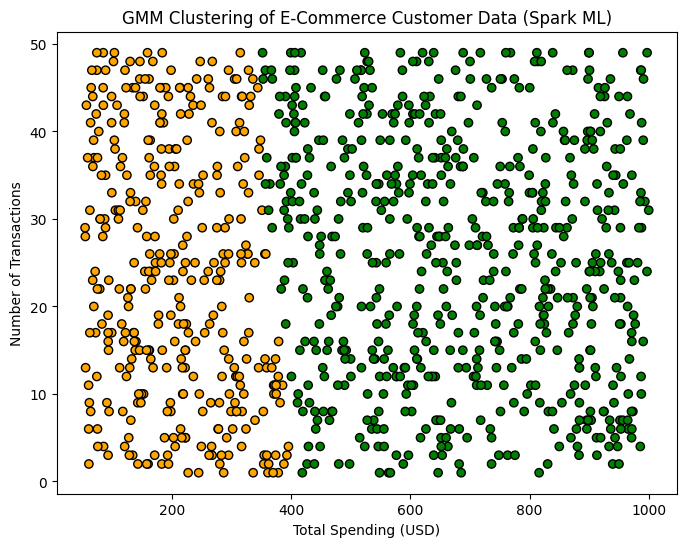

In [5]:
from pyspark.ml.clustering import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

gmm = GaussianMixture(featuresCol="features", k=2, probabilityCol="probability", predictionCol="prediction")
model = gmm.fit(feature_data)

if model.hasSummary:
    print("Log Likelihood:", model.summary.logLikelihood)

result = model.transform(feature_data)

plot_df = result.select("Total_Spending", "Num_Transactions", "prediction").toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(plot_df["Total_Spending"], plot_df["Num_Transactions"],
            c=plot_df["prediction"], cmap=ListedColormap(['orange', 'blue', 'green']),
            marker='o', edgecolor='k')
plt.title("GMM Clustering of E-Commerce Customer Data (Spark ML)")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.show()